In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/lucko515/regression-python/master/Salaries%20based%20on%20Positions%20-%20dataset/Position_Salaries.csv')

In [3]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
# create independent and dep variables
X = data.iloc[:, 1:2].values
y = data.iloc[:, 2].values

In [5]:
# create split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
# Apply linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [7]:
# training
lr.fit(X, y)
y_pred = lr.predict(X)

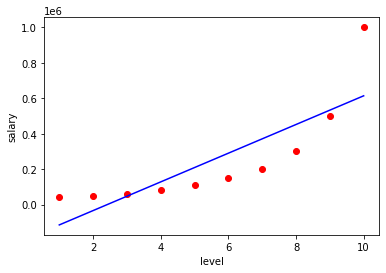

In [8]:
plt.scatter(X, y, color='red')
plt.plot(X, y_pred, color='blue')
plt.xlabel('level')
plt.ylabel('salary')
plt.show()

In [9]:
# Apply polynomial regression
# create variable into n degree of polynomial
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)

In [10]:
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [11]:
polynomial_reg = LinearRegression()
polynomial_reg.fit(X_poly, y)

LinearRegression()

In [12]:
y_pred_new = polynomial_reg.predict(X_poly)
y_pred_new

array([ 53356.64335673,  31759.90675989,  58642.19114214,  94632.86713283,
       121724.94172492, 143275.05827504, 184003.49650348, 289994.17249416,
       528694.63869465, 988916.08391617])

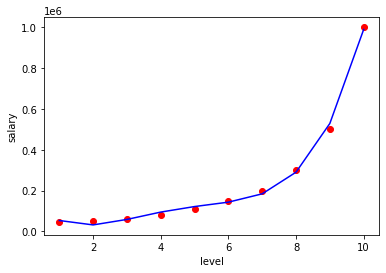

In [13]:
plt.scatter(X, y, color='red')
plt.plot(X, y_pred_new, color='blue')
plt.xlabel('level')
plt.ylabel('salary')
plt.show()

In [14]:
polynomial_reg.coef_

array([      0.        , -211002.33100264,   94765.44289054,
        -15463.2867133 ,     890.15151515])

In [15]:
polynomial_reg.intercept_

184166.66666697623

In [16]:
# real time prediction
# level is 5, predict the salary
lr.predict([[5]])

array([209060.60606061])

In [17]:
level_data = poly_reg.fit_transform([[5]])
polynomial_reg.predict(level_data)

array([121724.94172492])

In [18]:
# conclusion - there is a difference in both predictions, non linear inputs require non linear models

In [19]:
# load the dataset
data = pd.read_csv('housing.csv')
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [20]:
data.isnull().sum()

CRIM        0
 ZN         0
 INDUS      0
 CHAS       0
 NOX        0
 RM         0
 AGE        0
 DIS        0
 RAD        0
 TAX        0
 PTRATIO    0
 B          0
 LSTAT      0
MEDV        0
dtype: int64

In [21]:
# create independent & dependent variables
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [23]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=5.0)

In [24]:
ridge_reg.fit(X_train, y_train)
y_pred = ridge_reg.predict(X_test)

In [25]:
# calculate score
from sklearn.metrics import mean_squared_error, r2_score
print('MSE', mean_squared_error(y_test, y_pred))

MSE 22.902386317267556


In [26]:
print('r2 score', r2_score(y_test, y_pred))

r2 score 0.6729498716907126


In [27]:
# train score
y_pred_train = ridge_reg.predict(X_train)
print('r2 score on train data', r2_score(y_train, y_pred_train))

r2 score on train data 0.7417470497702194


In [52]:
# To find the best alpha apply grid search cv
from sklearn.model_selection import GridSearchCV

grid = dict()
grid['alpha'] = np.arange(0, 1, 0.1)
ridge_reg = Ridge()
grid_search = GridSearchCV(estimator=ridge_reg, param_grid=grid, scoring='neg_mean_absolute_error', 
                           cv=5, n_jobs=-1, verbose=2)

results = grid_search.fit(X_train, y_train)

print('Best parameters are ', results.best_params_)
print('Best score ', results.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters are  {'alpha': 0.5}
Best score  -3.5033033987886397
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.2; total time=   0.0s
[CV] END ..........................................alpha=0.2; total time=   0.0s
[CV] END ..........................alpha=0.30000000000000004; total time=   0.0s
[CV] END ..........................alpha=0.30000000000000004; total time=   0.0s
[CV] END ..........................alpha=0.30000000000000004; total time=   0.0s
[CV] END ..........................alpha=0.30000000000000004; total time=   0.0s
[CV] END ..........................................alpha=0.4;

In [49]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(X_train, y_train)

y_pred = ridge_reg.predict(X_test)
y_pred_train = ridge_reg.predict(X_train)

In [50]:
# calculate the score
from sklearn.metrics import mean_squared_error, r2_score
print('MSE', mean_squared_error(y_test, y_pred))
print('r2 score', r2_score(y_test, y_pred))
print('r2 score train', r2_score(y_train, y_pred_train))

MSE 22.312902839780186
r2 score 0.6813678000357206
r2 score train 0.7472594470483025


In [51]:
ridge_reg.coef_

array([-1.25363109e-01,  3.07217281e-02,  2.86295964e-02,  2.63656727e+00,
       -1.13943702e+01,  4.38192912e+00, -1.32792095e-02, -1.32939616e+00,
        2.48598829e-01, -1.05097528e-02, -8.64525961e-01,  1.33817060e-02,
       -5.28002165e-01])